In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating a path
path = r'C:\Users\haari\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
#importing latest dataframe from previous notebook
df_small = pd.read_pickle(os.path.join(path, '02 Data', 'Processed Data', 'df_small_secure.pkl'))

In [4]:
#check the output
df_small.shape

(9729960, 34)

In [5]:
pd.set_option('display.max_columns', None)
df_small.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,Avg_amt_spent,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
6,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low-range product,Slowest days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
10,2398795,1,prior,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,121.0,14.0,4.0,Low-range product,Slowest days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000


In [6]:
df_small['frequency'] = df_small['frequency'].astype('int64')

In [7]:
pd.set_option('display.max_columns', None)
df_small.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,Avg_amt_spent,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average_orders,10,New customer,6.367797,Low spender,20,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
6,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low-range product,Slowest days,Most_orders,10,New customer,6.367797,Low spender,20,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000
10,2398795,1,prior,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,121.0,14.0,4.0,Low-range product,Slowest days,Most_orders,10,New customer,6.367797,Low spender,20,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000


In [8]:
#step5: creating a 'department_id' profile
goods_profile_list = []
    
for value in df_small['department_id']:
    if value == 1:
        goods_profile_list.append('Frozen')
    elif value == 2:
        goods_profile_list.append('Other')
    elif value == 3:
        goods_profile_list.append('Bakery')
    elif value == 4:
        goods_profile_list.append('Produce')
    elif value == 5:
        goods_profile_list.append('Alcohol')
    elif value == 6:
        goods_profile_list.append('International')
    elif value == 7:
        goods_profile_list.append('Beverages')
    elif value == 8:
        goods_profile_list.append('Pets')
    elif value == 9:
        goods_profile_list.append('Dry goods pasta')
    elif value == 10:
        goods_profile_list.append('Bulk')
    elif value == 11:
        goods_profile_list.append('Personal care')
    elif value == 12:
        goods_profile_list.append('Meat seafood')
    elif value == 13:
        goods_profile_list.append('Pantry')
    elif value == 14:
        goods_profile_list.append('Breakfast')
    elif value == 15:
        goods_profile_list.append('Canned goods')
    elif value == 16:
        goods_profile_list.append('Dairy eggs')
    elif value == 17:
        goods_profile_list.append('Household')
    elif value == 18:
        goods_profile_list.append('Babies')
    elif value == 19:
        goods_profile_list.append('Snacks')
    elif value == 20:
        goods_profile_list.append('Deli')
    elif value == 21:
        goods_profile_list.append('Misc')
    else:
        goods_profile_list.append('Missing')

In [9]:
#check the output of new column
goods_profile_list

['Beverages',
 'Snacks',
 'Snacks',
 'Snacks',
 'Breakfast',
 'Snacks',
 'Snacks',
 'Dairy eggs',
 'Beverages',
 'Snacks',
 'Snacks',
 'Produce',
 'Snacks',
 'Beverages',
 'Beverages',
 'Dairy eggs',
 'Snacks',
 'Produce',
 'Snacks',
 'Snacks',
 'Produce',
 'Produce',
 'Snacks',
 'Deli',
 'Deli',
 'Snacks',
 'Frozen',
 'Breakfast',
 'Personal care',
 'Dairy eggs',
 'Snacks',
 'Deli',
 'Produce',
 'Produce',
 'Deli',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Snacks',
 'Deli',
 'Produce',
 'Beverages',
 'Snacks',
 'Snacks',
 'Produce',
 'Dairy eggs',
 'Dairy eggs',
 'Meat seafood',
 'Beverages',
 'Produce',
 'Frozen',
 'Dairy eggs',
 'Snacks',
 'Snacks',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Frozen',
 'Produce',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Snacks',
 'Snacks',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Beverages',
 'Produce',
 'Dairy eggs',
 'Deli',
 'Deli',
 'Dairy eggs',
 'Snacks',
 'Snacks',
 'Snacks',
 'Beverages',
 'I

In [10]:
#assigning profile list to the data frame
df_small['goods_profile'] = goods_profile_list

In [11]:
#check new column's count
df_small['goods_profile'].value_counts(dropna = False)

Produce            2842354
Dairy eggs         1620192
Snacks              866870
Beverages           805918
Frozen              670004
Pantry              563508
Bakery              351487
Canned goods        320071
Deli                315130
Dry goods pasta     260330
Household           221621
Meat seafood        212292
Breakfast           211215
Personal care       134164
Babies              126875
International        80800
Alcohol              46283
Pets                 29630
Misc                 20839
Other                10845
Bulk                 10362
Missing               9170
Name: goods_profile, dtype: int64

In [12]:
#profiling dependants variable
df_small['num_of_dependants'].value_counts().sort_index()

0    2430091
1    2427983
2    2428085
3    2443801
Name: num_of_dependants, dtype: int64

In [13]:
#creating 'num_of_dependants' profile list
dependants_profile_list = []

for value in df_small['num_of_dependants']:
    if value == 0:
        dependants_profile_list.append('Non-parent')
    else:
        dependants_profile_list.append('Parent')

In [14]:
#check the output of the created list
dependants_profile_list

['Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',

In [15]:
#assigning the profile list to the data frame
df_small['dependants_profile'] = dependants_profile_list

In [16]:
#chekc the output
df_small['dependants_profile'].value_counts(dropna = False)

Parent        7299869
Non-parent    2430091
Name: dependants_profile, dtype: int64

In [17]:
#step 6: Create an appropriate visualization to show the distribution of profiles
#Age profile visualization
df_small['age_profile'].value_counts().sort_index()

18-24    1072029
25-34    1516911
35-44    1519802
45-54    1535470
55-64    1511399
65-74    1502735
75-84    1071614
Name: age_profile, dtype: int64

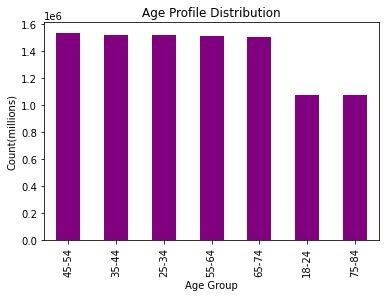

In [18]:
#creating a bar chart
age_chart = df_small['age_profile'].value_counts().plot.bar(color = 'purple', xlabel = 'Age Group', ylabel = 'Count(millions)', title = 'Age Profile Distribution')

In [19]:
#saving the above bar chart
age_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_Profile_Dist.png'))

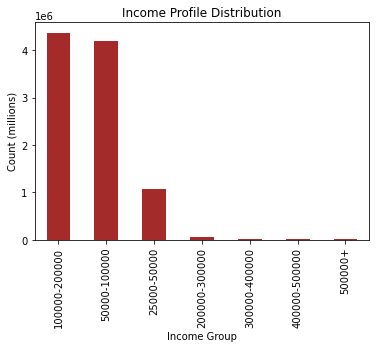

In [20]:
#creating a bar chart for Income profile distribution
income_chart = df_small['income_profile'].value_counts().plot.bar(color = 'brown', xlabel = 'Income Group', ylabel = 'Count (millions)', title = 'Income Profile Distribution')

In [21]:
#saving the income bar chart
income_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_Profile_Dist.png'))

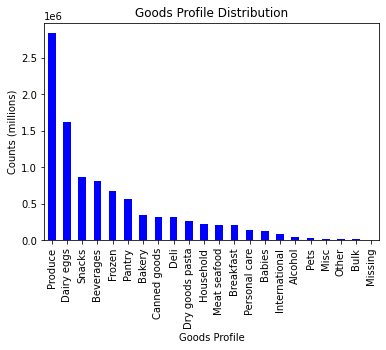

In [22]:
#Creating a bar chart for goods profile 
goods_chart = df_small['goods_profile'].value_counts().plot.bar(color = 'blue', xlabel = 'Goods Profile', ylabel = 'Counts (millions)', title = 'Goods Profile Distribution')

In [23]:
#saving the goods profile bar chart
goods_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Goods_Profile_Dist.png'))

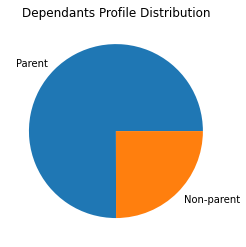

In [24]:
#creating a pie chart for dependants profile
dependants_chart = df_small['dependants_profile'].value_counts().plot.pie(title = 'Dependants Profile Distribution', ylabel = '')

In [25]:
#saving the pie chart
dependants_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Dependants_Profile_Dist.png'))

In [26]:
#step 8: compare your customer profiles with regions and departments. Identify a link between them
#creating a crosstab between region and spending flag
region_spending_crosstab = pd.crosstab(df_small['region'], df_small['spending_flag'], dropna = False)

In [27]:
#check the output
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,46693,2235678
Northeast,32530,1684846
South,62858,3177912
West,48114,2441329


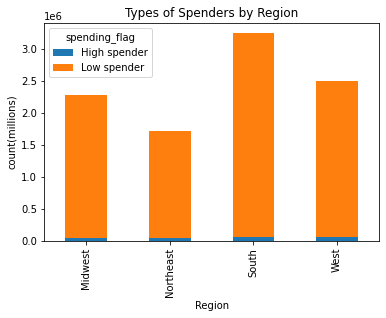

In [28]:
#creating a barchart using the crosstab between region and spending flag
region_spending_chart = region_spending_crosstab.plot.bar(stacked = True, xlabel = 'Region', ylabel = 'count(millions)', title = 'Types of Spenders by Region')

In [29]:
#saving the stacked bar chart
region_spending_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Region_Spending_chart.png'))

In [30]:
#creating a crosstab for spending_flag and loyal customers
loyalty_spending_crosstab = pd.crosstab(df_small['loyalty_flag'], df_small['spending_flag'], dropna = False)

In [31]:
#check the output
loyalty_spending_crosstab

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,65066,3021526
New customer,34568,1839733
Regular customer,90561,4678506


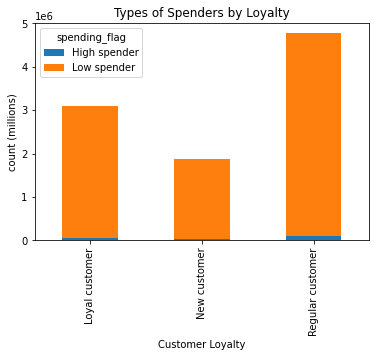

In [32]:
#creating a barchart using the crosstab between region and spending flag
loyalty_spending_chart = loyalty_spending_crosstab.plot.bar(stacked = True, xlabel = 'Customer Loyalty', ylabel = 'count (millions)', title = 'Types of Spenders by Loyalty')

In [33]:
#creating a price range profile 
pd.set_option('display.max_rows', None)
df_small['prices'].value_counts().sort_index()

1.0         34612
1.1         72864
1.2         76875
1.3        127326
1.4        117078
1.5         45771
1.6         89340
1.7         64140
1.8         96553
1.9         46881
2.0         85989
2.1         61678
2.2         48147
2.3         72767
2.4         58896
2.5         73918
2.6         63706
2.7         59934
2.8         46069
2.9         79235
3.0         57943
3.1         74379
3.2         76344
3.3         71668
3.4         66961
3.5         66799
3.6         90526
3.7         66702
3.8         94933
3.9         63568
4.0        133894
4.1         80467
4.2         74103
4.3         48600
4.4        107381
4.5        110409
4.6         43411
4.7         66375
4.8         58087
4.9         94924
5.0         67430
5.1         67245
5.2         75040
5.3         85421
5.4         61923
5.5         75732
5.6         54875
5.7         97421
5.8         72774
5.9         62501
6.0         59302
6.1         72701
6.2         53586
6.3        131480
6.4         61579
6.5       

In [34]:
#creating a new column for 'prices' profiling
prices_profile_list = []
    
for value in df_small['prices']:
    if (value >= 1) and (value <= 10):
        prices_profile_list.append('Lower Price Group')
    elif (value >= 11) and (value <=20):
        prices_profile_list.append('Medium Price Group')
    elif (value >= 21) and (value <= 30):
        prices_profile_list.append('High Price Group')
    elif (value == 14900) or (value == 99999):
        prices_profile_list.append('Extremely High Price Group')
    else:
        prices_profile_list.append('Missing')

In [35]:
#check the output of the prices_profile_list
prices_profile_list

['Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Missing',
 'Lower Price Group',
 'Medium Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Missing',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Medium Price Group',
 'Medium Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Medium Price Group',
 'Medium Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Medium Price Group',
 'Missing',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Lower Price Group',
 'Missing',


In [36]:
#assigning profile list to the data frame
df_small['price_profile'] = prices_profile_list

In [37]:
#check the output with the dataframe
df_small['price_profile'].value_counts().sort_index()

Extremely High Price Group       1509
High Price Group                61944
Lower Price Group             6566361
Medium Price Group            2533096
Missing                        567050
Name: price_profile, dtype: int64

In [38]:
df_price_missing = df_small[df_small['price_profile'] == 'Missing']

In [39]:
df_price_missing.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,Avg_amt_spent,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,goods_profile,dependants_profile,price_profile
28,431534,1,prior,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24.0,4.0,10.3,Mid-range product,Slowest days,Most_orders,10,New customer,6.367797,Low spender,20,Non-Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity Customer,25-34,25000-50000,Produce,Parent,Missing
70,2168274,2,prior,1,2,11,NaN,13176,12,0,Bag of Organic Bananas,24.0,4.0,10.3,Mid-range product,Regularly busy,Most_orders,14,Regular customer,7.515897,Low spender,13,Regular Customer,Female,Alaska,68,7/4/2017,3,married,64940,West,Normal Activity Customer,65-74,50000-100000,Produce,Parent,Missing
122,1199898,2,prior,6,2,9,13.0,17872,14,0,Total 2% Lowfat Plain Greek Yogurt,120.0,16.0,10.4,Mid-range product,Regularly busy,Most_orders,14,Regular customer,7.515897,Low spender,13,Regular Customer,Female,Alaska,68,7/4/2017,3,married,64940,West,Normal Activity Customer,65-74,50000-100000,Dairy eggs,Parent,Missing
152,788338,2,prior,8,1,15,27.0,40198,9,1,Blueberry Yoghurt,120.0,16.0,10.1,Mid-range product,Busiest days,Most_orders,14,Regular customer,7.515897,Low spender,13,Regular Customer,Female,Alaska,68,7/4/2017,3,married,64940,West,Normal Activity Customer,65-74,50000-100000,Dairy eggs,Parent,Missing
156,788338,2,prior,8,1,15,27.0,20084,13,0,Pineapple Apple Mint Organic Cold Pressed Juicd,31.0,7.0,10.1,Mid-range product,Busiest days,Most_orders,14,Regular customer,7.515897,Low spender,13,Regular Customer,Female,Alaska,68,7/4/2017,3,married,64940,West,Normal Activity Customer,65-74,50000-100000,Beverages,Parent,Missing


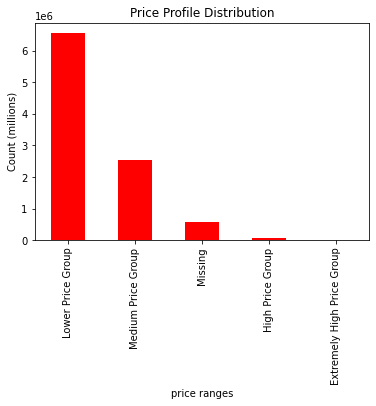

In [40]:
price_profile_distribution = df_small['price_profile'].value_counts().plot.bar(color = 'red', xlabel = 'price ranges', ylabel = 'Count (millions)', title = 'Price Profile Distribution')

In [41]:
price_profile_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_profile.png'))


In [42]:
#crosstab between age_group and family status columns to find the relation between them
fam_age_crosstab = pd.crosstab(df_small['age_profile'], df_small['fam_status'], dropna = False)

In [43]:
#check the output
fam_age_crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
age_profile,,,,
18-24,0,465637,347618,258774
25-34,0,0,1129046,387865
35-44,0,0,1142586,377216
45-54,0,0,1159318,376152
55-64,195563,0,1117881,197955
65-74,370520,0,1132215,0
75-84,266046,0,805568,0


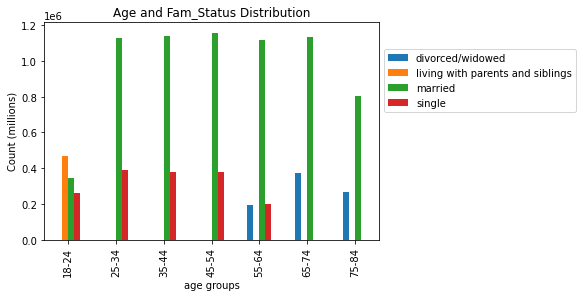

In [44]:
#creating a barchart visualization for the above crosstab
age_fam_distribution = fam_age_crosstab.plot.bar( xlabel = 'age groups', ylabel = 'Count (millions)', title = 'Age and Fam_Status Distribution')
age_fam_distribution.legend(bbox_to_anchor = (1, 0.9))

In [45]:
#saving the visualization
age_fam_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_fam_distribution.png'))

In [46]:
#creating a crosstab between age group and loyalty status
age_loyalty_crosstab = pd.crosstab(df_small['age_profile'], df_small['loyalty_flag'], dropna = False)

In [47]:
#check the output
age_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
age_profile,,,
18-24,342874,205280,523875
25-34,471880,294511,750520
35-44,484591,289586,745625
45-54,487980,292830,754660
55-64,482422,294511,734466
65-74,476418,291860,734457
75-84,340427,205723,525464


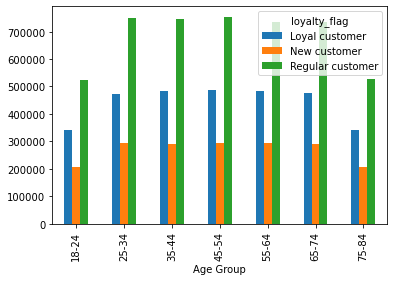

In [48]:
#creating a visualization
age_loyal_dist = age_loyalty_crosstab.plot.bar(xlabel = 'Age Group')

In [49]:
#saving the visualization
age_loyal_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyal_dist.png'))

In [50]:
#creating a crosstab between dependants profile and loyalty flag
dependant_loyal_crosstab = pd.crosstab(df_small['loyalty_flag'], df_small['dependants_profile'], dropna = False)

In [51]:
#check the output
dependant_loyal_crosstab

dependants_profile,Non-parent,Parent
loyalty_flag,,
Loyal customer,775885,2310707
New customer,467655,1406646
Regular customer,1186551,3582516


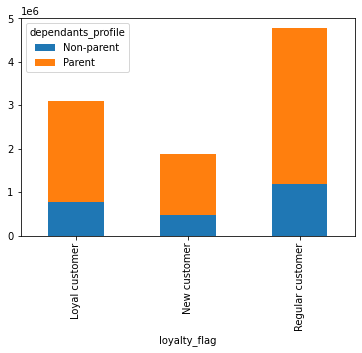

In [52]:
#creating a visualization
dependant_loyal_chart = dependant_loyal_crosstab.plot.bar(stacked = True)

In [53]:
#saving the visualization
dependant_loyal_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_loyal_chart.png'))

In [54]:
#crosstab between dependants_profile and goods_profile
dep_goods_crosstab = pd.crosstab(df_small['dependants_profile'], df_small['goods_profile'], dropna = False)

In [55]:
#check the output
dep_goods_crosstab

goods_profile,Alcohol,Babies,Bakery,Beverages,Breakfast,Bulk,Canned goods,Dairy eggs,Deli,Dry goods pasta,Frozen,Household,International,Meat seafood,Misc,Missing,Other,Pantry,Personal care,Pets,Produce,Snacks
dependants_profile,,,,,,,,,,,,,,,,,,,,,,
Non-parent,11774,31784,88271,201752,52332,2449,79412,405079,79668,64656,166860,54103,20426,51865,5114,2415,2650,140425,33538,7477,712159,215882
Parent,34509,95091,263216,604166,158883,7913,240659,1215113,235462,195674,503144,167518,60374,160427,15725,6755,8195,423083,100626,22153,2130195,650988


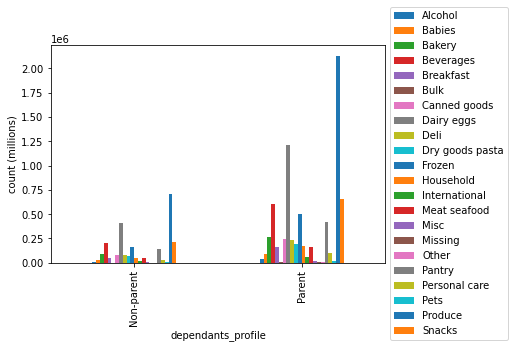

In [56]:
#creating a visualization
dep_goods_chart = dep_goods_crosstab.plot.bar(ylabel = 'count (millions)')
dep_goods_chart.legend(bbox_to_anchor = (1, 1.2))

In [57]:
#saving the visualization
dep_goods_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_goods_chart.png'))

In [58]:
#crosstab between order frequency and family profile
dep_freq_crosstab = pd.crosstab(df_small['dependants_profile'], df_small['frequency'], dropna = False)

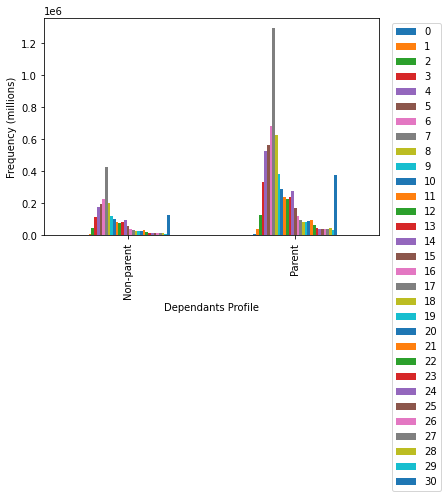

In [67]:
#create a visualization
dep_freq_chart = dep_freq_crosstab.plot.bar(xlabel = 'Dependants Profile', ylabel = 'Frequency (millions)')
dep_freq_chart.legend(bbox_to_anchor = (1.2, 1), loc = 'best')

In [69]:
#saving the visualiztion
dep_freq_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_freq_chart.png'))

In [70]:
#create a crosstab between order_hour_of_day and dependants_profile
hour_dep_crosstab = pd.crosstab(df_small['order_hour_of_day'], df_small['dependants_profile'], dropna = False)

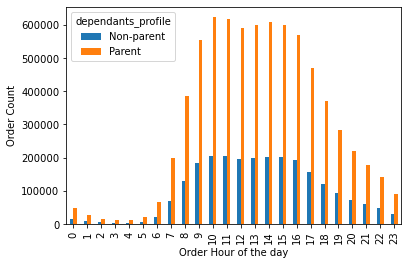

In [72]:
#create visualization
hour_dep_chart = hour_dep_crosstab.plot.bar(xlabel = 'Order Hour of the day', ylabel = 'Order Count')

In [73]:
hour_dep_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_dep_chart.png'))

In [74]:
#crosstab between region and goods_profile
region_goods_crosstab = pd.crosstab(df_small['goods_profile'], df_small['region'], dropna = False)

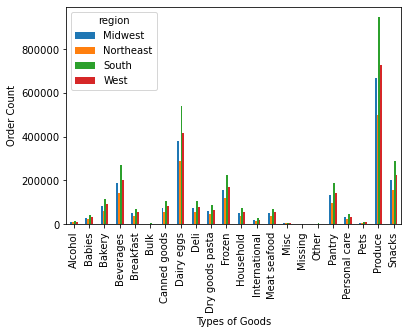

In [76]:
#creating a visualization
region_goods_chart = region_goods_crosstab.plot.bar(xlabel = 'Types of Goods', ylabel = 'Order Count')

In [77]:
#saving visualization
region_goods_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_goods_chart.png'))

In [78]:
#crosstab between family status and loyalty flag
fam_loyal_crosstab = pd.crosstab(df_small['loyalty_flag'], df_small['fam_status'], dropna = False)

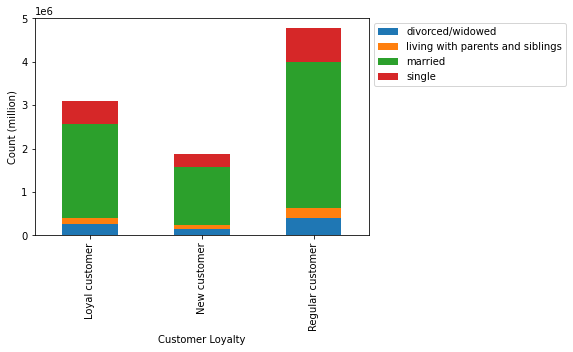

In [80]:
#creating a visualization
fam_loyal_chart = fam_loyal_crosstab.plot.bar(stacked = True, xlabel = 'Customer Loyalty', ylabel = 'Count (million)')
fam_loyal_chart.legend(bbox_to_anchor = (1, 1), loc = 'best')

In [81]:
#saving visualization
fam_loyal_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_loyal_chart.png'))

In [82]:
#exporting the finished data frame
df_small.to_pickle(os.path.join(path, '02 Data', 'Processed Data', 'IC_Final_DataSet.pkl'))